In [214]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # Adjust the configuration of the plots we will create

#Read in the data

df = pd.read_csv(r'C:\Users\SENANU\Desktop\Data Analytics\Portfolio\Movie_Analysis\movies.csv')

#Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [215]:
# Checking for missing data through a loop
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing,1)))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.3%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [216]:
# Data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [217]:
# changing data types of columns (budget & gross) to interger

df['budget'] = df['budget'].astype(pd.Int64Dtype())

df['gross'] = df['gross'].astype(pd.Int64Dtype())

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [218]:
# Creating a new year column from released date because year & released date are different

#df['update_year']= df['released'].astype(str).str[:4]
df['year_corrected'] = int(df['released'].str.split()[0][2])
df.drop(columns='year',inplace=True)

df.head()


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [219]:
# Sorting values by gross, inplace = False returns a copy of operation performes
df = df.sort_values(by=['gross'],inplace=False, ascending=False)

In [220]:
# To display all rows in the dataframe 
pd.set_option('display.max_rows',None)

In [221]:
# Drop duplicate values and get unique values

df['company'].drop_duplicates().sort_values(ascending = False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [222]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,1980
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,1980
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1980
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,1980
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,1980


In [223]:
# Get Top 10 companies by frequency
df['company'].value_counts().sort_values(ascending=False).head(10)

Universal Pictures           377
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Name: company, dtype: int64

In [241]:
# Replacing all NaN values in the table to 0 in order to plot the graph
df = df.fillna(0)

df[['budget','gross']].head()



,budget,gross
5445,237000000.0,2.847246e+09
7445,356000000.0,2.797501e+09
3045,200000000.0,2.201647e+09
6663,245000000.0,2.069522e+09
7244,321000000.0,2.048360e+09


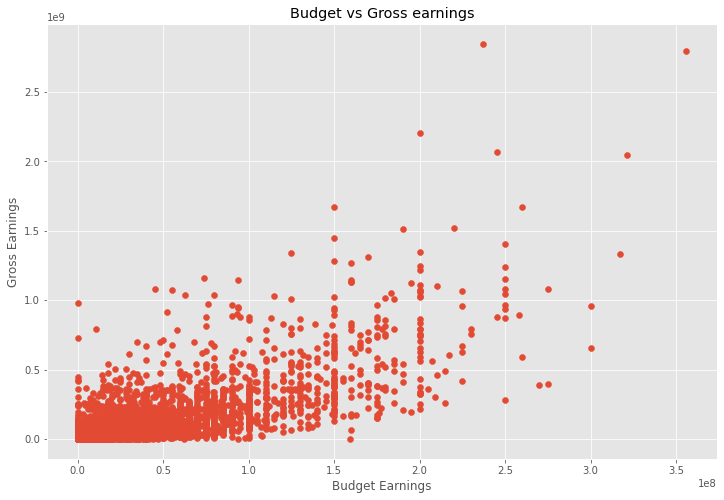

In [225]:
# Scatter plot

plt.scatter(x=df['budget'], y=df['gross'] )
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget Earnings')
plt.ylabel('Gross Earnings')
plt.show()

In [226]:
# Check above plot 
df[['name','company','budget','gross']].sort_values(by='gross', ascending=False).head(10)

,name,company,budget,gross
5445,Avatar,Twentieth Century Fox,237000000,2847246203
7445,Avengers: Endgame,Marvel Studios,356000000,2797501328
3045,Titanic,Twentieth Century Fox,200000000,2201647264
6663,Star Wars: Episode VII - The Force Awakens,Lucasfilm,245000000,2069521700
7244,Avengers: Infinity War,Marvel Studios,321000000,2048359754
7480,The Lion King,Walt Disney Pictures,260000000,1670727580
6653,Jurassic World,Universal Pictures,150000000,1670516444
6043,The Avengers,Marvel Studios,220000000,1518815515
6646,Furious 7,Universal Pictures,190000000,1515341399
7494,Frozen II,Walt Disney Animation Studios,150000000,1450026933


In [227]:
df.dtypes

name               object
rating             object
genre              object
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget              Int64
gross               Int64
company            object
runtime           float64
year_corrected      int64
dtype: object

In [228]:
# Convert both budget and gross to flaot in order to plot the graph
df['budget'] = df['budget'].astype(float)
df['gross'] = df['gross'].astype(float)
df.dtypes


name               object
rating             object
genre              object
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
year_corrected      int64
dtype: object

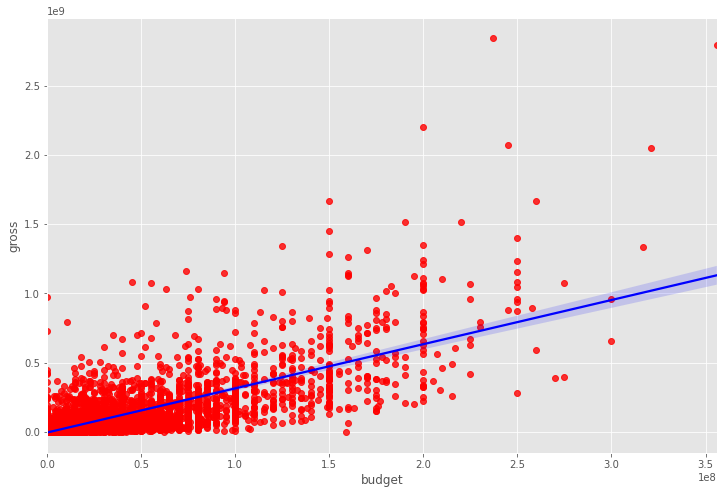

In [229]:
#Plot budget vs gross using seaborn (regression plot)

sns.regplot(x='budget',y='gross', data=df, 
            scatter_kws = {'color':'red'},
            line_kws = {'color':'blue'})

In [230]:
# Looking at the correlation
df.corr(method='pearson') # Types of regression methods pearson, kendall, spearman

,score,votes,budget,gross,runtime,year_corrected
score,1.000000,0.407101,0.056863,0.186012,0.394564,NaN
votes,0.407101,1.000000,0.486931,0.632870,0.306984,NaN
budget,0.056863,0.486931,1.000000,0.750157,0.268372,NaN
gross,0.186012,0.632870,0.750157,1.000000,0.244339,NaN
runtime,0.394564,0.306984,0.268372,0.244339,1.000000,NaN
year_corrected,NaN,NaN,NaN,NaN,NaN,NaN


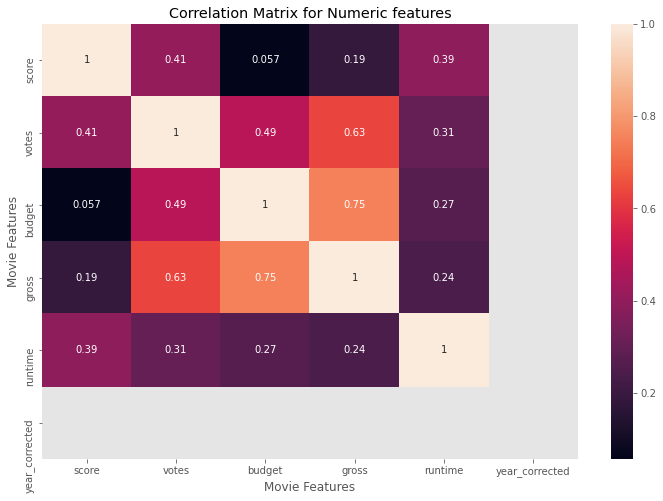

In [231]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [232]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,1980
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,1980
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1980
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,1980
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,1980


In [233]:
# Looking at company
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.dtypes

name                int16
rating               int8
genre                int8
released            int16
score             float64
votes             float64
director            int16
writer              int16
star                int16
country              int8
budget            float64
gross             float64
company             int16
runtime           float64
year_corrected      int64
dtype: object

In [234]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,533,6,0,697,7.8,1100000.0,1155,1779,2335,56,237000000.0,2.847246e+09,2254,162.0,1980
7445,535,6,0,184,8.4,903000.0,162,744,2242,56,356000000.0,2.797501e+09,1607,181.0,1980
3045,6896,6,6,705,7.8,1100000.0,1155,1779,1596,56,200000000.0,2.201647e+09,2254,194.0,1980
6663,5144,6,0,699,7.8,876000.0,1125,2551,525,56,245000000.0,2.069522e+09,1541,138.0,1980
7244,536,6,0,193,8.4,897000.0,162,744,2242,56,321000000.0,2.048360e+09,1607,149.0,1980


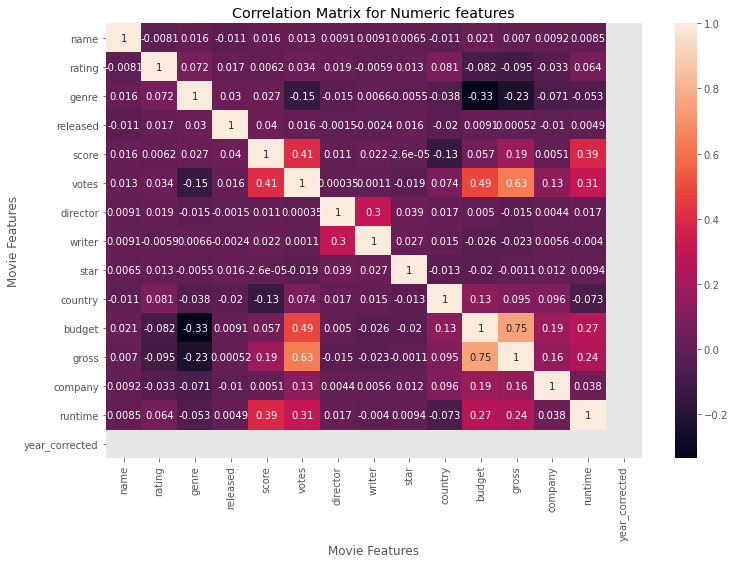

In [235]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [236]:
correlation_matrix

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
name,1.000000,-0.008069,0.016355,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,NaN
rating,-0.008069,1.000000,0.072423,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,NaN
genre,0.016355,0.072423,1.000000,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,NaN
released,-0.011311,0.016613,0.029822,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,NaN
score,0.016377,0.006192,0.027384,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,NaN
votes,0.013038,0.033743,-0.145296,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,NaN
director,0.009079,0.019483,-0.015258,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,NaN
writer,0.009081,-0.005921,0.006567,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,NaN
star,0.006472,0.013405,-0.005477,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,NaN
country,-0.010737,0.081244,-0.037615,-0.020427,-0.133346,0.073525,0.017490,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.073319,NaN


In [237]:
#Unstaking
corr_pairs = correlation_matrix.unstack()
corr_pairs

name            name              1.000000
                rating           -0.008069
                genre             0.016355
                released         -0.011311
                score             0.016377
                votes             0.013038
                director          0.009079
                writer            0.009081
                star              0.006472
                country          -0.010737
                budget            0.020548
                gross             0.006989
                company           0.009211
                runtime           0.008483
                year_corrected         NaN
rating          name             -0.008069
                rating            1.000000
                genre             0.072423
                released          0.016613
                score             0.006192
                votes             0.033743
                director          0.019483
                writer           -0.005921
           

In [238]:
sort_pairs = corr_pairs.sort_values()
sort_pairs

budget          genre            -0.334021
genre           budget           -0.334021
gross           genre            -0.234297
genre           gross            -0.234297
votes           genre            -0.145296
genre           votes            -0.145296
score           country          -0.133346
country         score            -0.133346
gross           rating           -0.095450
rating          gross            -0.095450
budget          rating           -0.081939
rating          budget           -0.081939
runtime         country          -0.073319
country         runtime          -0.073319
genre           company          -0.071067
company         genre            -0.071067
genre           runtime          -0.052914
runtime         genre            -0.052914
genre           country          -0.037615
country         genre            -0.037615
rating          company          -0.032943
company         rating           -0.032943
writer          budget           -0.025911
budget     

In [239]:
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr.sort_values(ascending=False)

runtime   runtime     1.000000
writer    writer      1.000000
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
company   company     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
budget    gross       0.750157
gross     budget      0.750157
          votes       0.632870
votes     gross       0.632870
dtype: float64

In [240]:
# Budget and gross earnings have the highest correlation